In [1]:
#!/usr/bin/env python
##############################################
# Gabor filter, multiple filters in one. Generate fiter bank.
# ref: https://www.youtube.com/watch?v=QEz4bG9P3Qs
"""
ksize Size of the filter returned.
sigma Standard deviation of the gaussian envelope.
theta Orientation of the normal to the parallel stripes of a Gabor function.
lambda Wavelength of the sinusoidal factor.
gamma Spatial aspect ratio.
psi Phase offset.
ktype Type of filter coefficients. It can be CV_32F or CV_64F.
indicates the type and range of values that each pixel in the Gabor kernel can hold.
Basically float32 or float64
"""

import numpy as np
import cv2
import matplotlib.pyplot as plt

(128, 128)


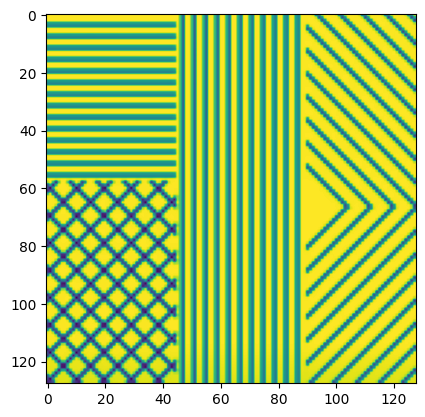

In [2]:
# img = cv2.imread('/src/v1/synthetic.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('/src/v1/artificial_patterns.png', cv2.IMREAD_GRAYSCALE)
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized
img = image_resize(img, height = 128)  # Resize image
img = img[:,23:151]
print(img.shape)
ksize = min(img.shape)
plt.imshow(img)

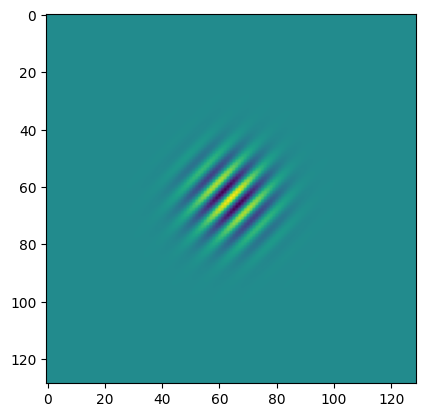

In [3]:
ksize = 128  # Use size that makes sense to the image and fetaure size. Large may not be good.
# On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 10  # Large sigma on small features will fully miss the features.
theta = 1 * np.pi / 4  # /4 shows horizontal 3/4 shows other horizontal. Try other contributions
lamda = 1 * np.pi / 4  # 1/4 works best for angled.
gamma = 1  # Value of 1 defines spherical. Calue close to 0 has high aspect ratio
# Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 0  # Phase offset. I leave it to 0.

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)
# if were to save the  filter
# cv2.imwrite('filter_cv.jpg', cv2.convertScaleAbs(kernel, alpha=(255.0)))

In [97]:
ksize = 128  # Use size that makes sense to the image and fetaure size. Large may not be good.
sigma = range(1,41, 5)  # Large sigma on small features will fully miss the features.
theta = [i * np.pi / 4 for i in range(1,5)]  # /4 shows horizontal 3/4 shows other horizontal. Try other contributions
lamda_coeff = [0.1, 0.5, 0.8, 1, 5, 10, 15, 20]
lamda = [i * np.pi / 4 for i in lamda_coeff]  # 1/4 works best for angled.
gamma_coeff = [0.1, 0.3, 0.5, 0.8, 1, 5]
gamma = [i * np.pi / 4 for i in gamma_coeff]  # Value of 1 defines spherical. Calue close to 0 has high aspect ratio
phi = 0  # Phase offset. I leave it to 0.

for now_sigma in sigma:
    for now_theta in theta:
        for now_lamda in lamda:
            for now_gamma in gamma:
                kernel = cv2.getGaborKernel((ksize, ksize), now_sigma, now_theta, now_lamda, now_gamma, phi, ktype=cv2.CV_32F)
                out_handle = f"filter_{ksize}_{now_sigma}_{now_theta}_{now_lamda}_{now_gamma}_{phi}.jpg"
                # print(out_handle)  
                cv2.imwrite(f'filters/{out_handle}', cv2.convertScaleAbs(kernel, alpha=(255.0)))


['filter', '128', '16', '2.356194490192345', '15.707963267948966', '0.7853981633974483', '0']
ksize 128
sigma 16.0
theta 2.356194490192345
lamda 15.707963267948966
gamma 0.7853981633974483
phi 0.0


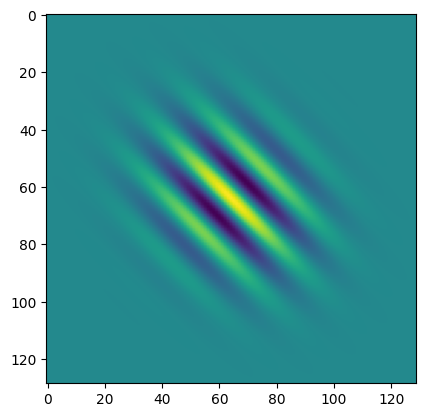

In [5]:
file_name = 'filter_128_16_2.356194490192345_15.707963267948966_0.7853981633974483_0.jpg'
def parse_gabor_param(file_name):
    print(file_name[:-4].split('_'))
    param_dict = {}
    now_params = file_name[:-4].split('_')
    ksize = int(now_params[1])
    param_dict['ksize'] = ksize
    now_sigma = float(now_params[2])
    param_dict['sigma'] = now_sigma
    now_theta = float(now_params[3])
    param_dict['theta'] = now_theta
    now_lamda = float(now_params[4])
    param_dict['lamda'] = now_lamda
    now_gamma = float(now_params[5])
    param_dict['gamma'] = now_gamma
    phi = float(now_params[6])
    param_dict['phi'] = phi
    kernel = cv2.getGaborKernel((ksize, ksize), now_sigma, now_theta, now_lamda, now_gamma, phi, ktype=cv2.CV_32F)
    return kernel, param_dict
GF, param_dict = parse_gabor_param(file_name)
plt.imshow(GF)
for k in param_dict.keys():
    print(k, param_dict[k])
# like the look of this one... use it in 4 directions...    

# changed sigma not sure if was necessary

In [6]:
# theta = [i * np.pi / 4 for i in range(1,5)]  # /4 shows horizontal 3/4 shows other horizontal. Try other contributions
ksize = param_dict['ksize']
theta = np.linspace(0, np.pi, 100)
# ksize =  20
# ksize =  128
sigma = 8
# sigma = param_dict['sigma']
lamda = param_dict['lamda']
gamma = param_dict['gamma']
phi = param_dict['phi']

k_collection = []
param_collection = {}

for k in param_dict.keys():
    param_collection[k] = []

for t in theta:
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, t, lamda, gamma, phi, ktype=cv2.CV_32F)
    
    param_collection['ksize'].append(ksize)
    param_collection['sigma'].append(sigma)
    param_collection['theta'].append(t)
    param_collection['lamda'].append(lamda)
    param_collection['gamma'].append(gamma)
    param_collection['phi'].append(phi)
    k_collection.append(kernel[:ksize,:ksize])

n_response = []
for k in k_collection:
    fimg = cv2.filter2D(img, cv2.CV_8UC3, k)
    n_response.append(np.sum(img*k))
    # plt.figure()
    # plt.imshow(k)
    # plt.figure()
    # plt.imshow(fimg)



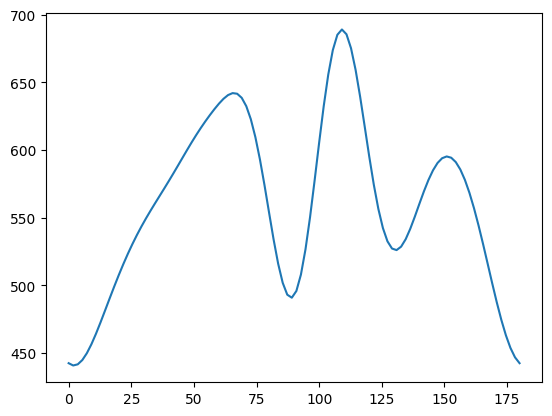

In [7]:
plt.plot(np.array(param_collection['theta'])*180/np.pi, np.abs(n_response))

Shift the kernel to target the upper right corner of the image...

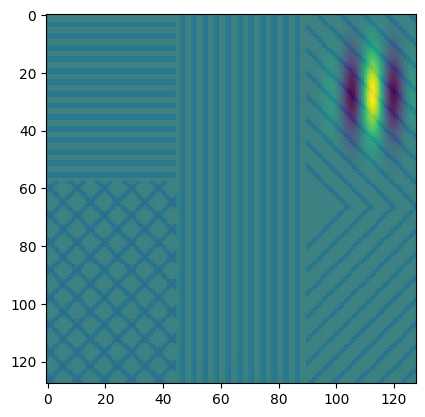

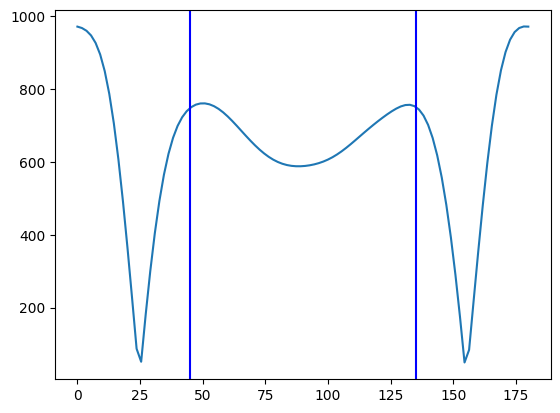

In [38]:
n_response = []
if_plt = True
for k in k_collection:
    k_shifted = cv2.getRectSubPix(k, (128,128), (15, 100))
    if if_plt:
        if_plt = False
        plt.figure()
        plt.imshow(k_shifted)
    # fimg = cv2.filter2D(img, cv2.CV_8UC3, k_shifted)
    n_response.append(np.sum(img*k_shifted))
plt.imshow(img, interpolation='none', alpha=0.1)
           
plt.figure()
plt.plot(np.array(param_collection['theta'])*180/np.pi, np.abs(n_response))
plt.axvline(x = 45, color = 'b')
plt.axvline(x = 135, color = 'b')

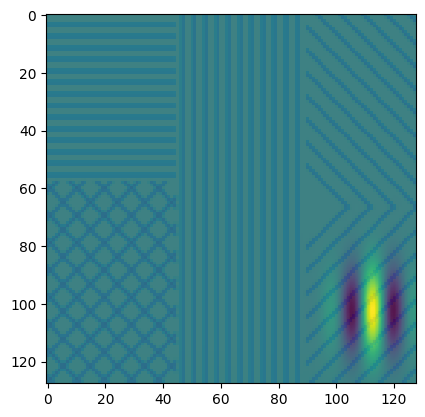

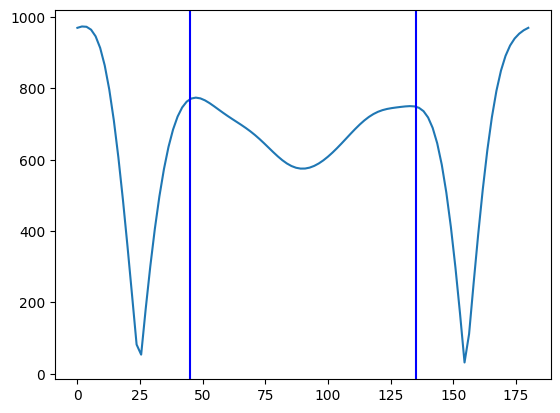

In [36]:
n_response = []
if_plt = True
for k in k_collection:
    k_shifted = cv2.getRectSubPix(k, (128,128), (15, 25)) 
    if if_plt:
        if_plt = False
        plt.figure()
        plt.imshow(k_shifted)
    # fimg = cv2.filter2D(img, cv2.CV_8UC3, k_shifted)
    n_response.append(np.sum(img*k_shifted))
plt.imshow(img, interpolation='none', alpha=0.1)
           
plt.figure()
plt.plot(np.array(param_collection['theta'])*180/np.pi, np.abs(n_response))
plt.axvline(x = 45, color = 'b')
plt.axvline(x = 135, color = 'b')

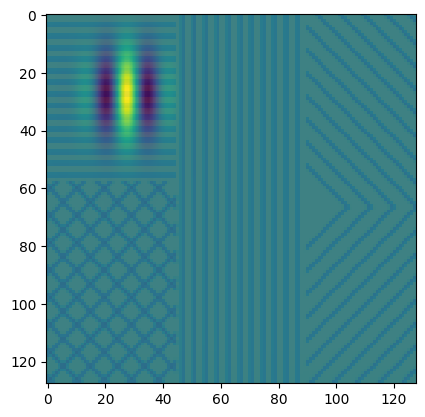

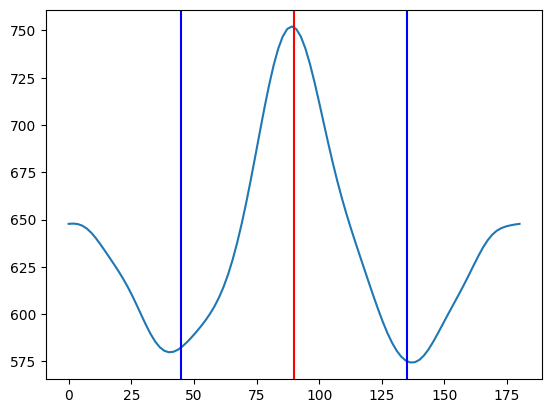

In [40]:
n_response = []
if_plt = True
for k in k_collection:
    k_shifted = cv2.getRectSubPix(k, (128,128), (100, 100))
    if if_plt:
        if_plt = False
        plt.figure()
        plt.imshow(k_shifted)
    # fimg = cv2.filter2D(img, cv2.CV_8UC3, k_shifted)
    n_response.append(np.sum(img*k_shifted))
plt.imshow(img, interpolation='none', alpha=0.1)
           
plt.figure()
plt.plot(np.array(param_collection['theta'])*180/np.pi, np.abs(n_response))
plt.axvline(x = 45, color = 'b')
plt.axvline(x = 90, color = 'r')
plt.axvline(x = 135, color = 'b')

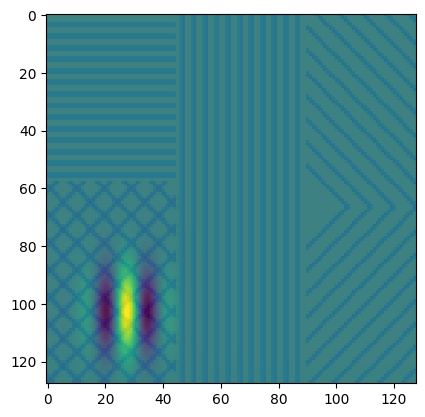

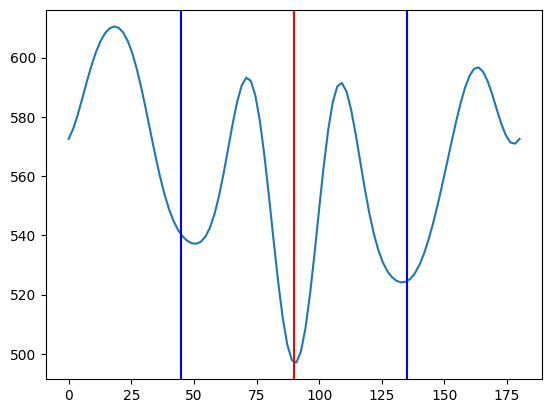

In [43]:
n_response = []
if_plt = True
for k in k_collection:
    k_shifted = cv2.getRectSubPix(k, (128,128), (100, 25))
    if if_plt:
        if_plt = False
        plt.figure()
        plt.imshow(k_shifted)
    # fimg = cv2.filter2D(img, cv2.CV_8UC3, k_shifted)
    n_response.append(np.sum(img*k_shifted))
plt.imshow(img, interpolation='none', alpha=0.1)
           
plt.figure()
plt.plot(np.array(param_collection['theta'])*180/np.pi, np.abs(n_response))
plt.axvline(x = 45, color = 'b')
plt.axvline(x = 90, color = 'r')
plt.axvline(x = 135, color = 'b')

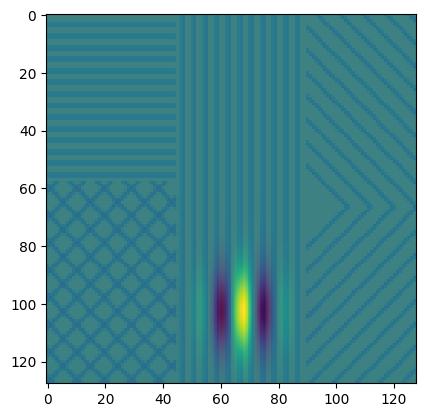

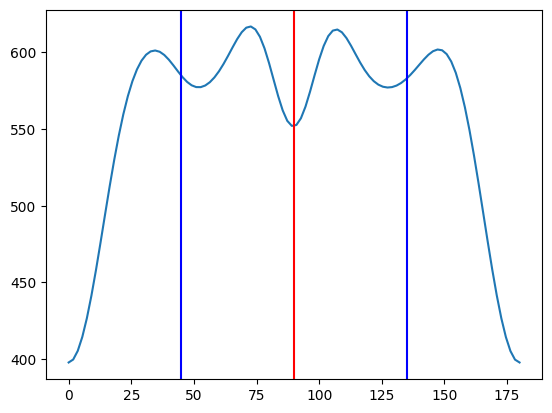

In [53]:
n_response = []
if_plt = True
for k in k_collection:
    k_shifted = cv2.getRectSubPix(k, (128,128), (60, 25))
    if if_plt:
        if_plt = False
        plt.figure()
        plt.imshow(k_shifted)
    # fimg = cv2.filter2D(img, cv2.CV_8UC3, k_shifted)
    n_response.append(np.sum(img*k_shifted))
plt.imshow(img, interpolation='none', alpha=0.1)
           
plt.figure()
plt.plot(np.array(param_collection['theta'])*180/np.pi, np.abs(n_response))
plt.axvline(x = 45, color = 'b')
plt.axvline(x = 90, color = 'r')
plt.axvline(x = 135, color = 'b')

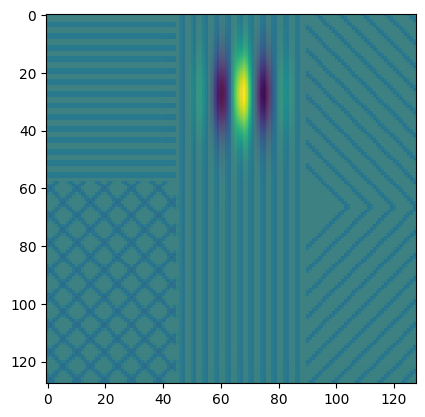

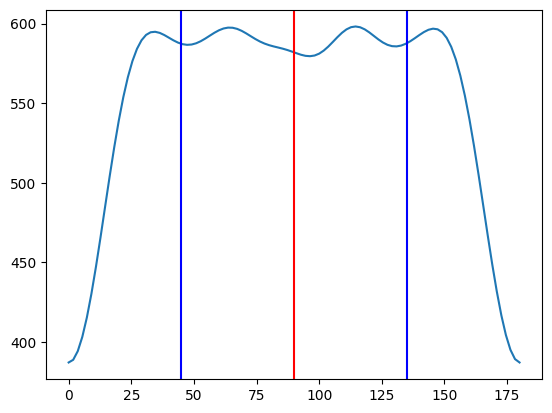

In [54]:
n_response = []
if_plt = True
for k in k_collection:
    k_shifted = cv2.getRectSubPix(k, (128,128), (60, 100))
    if if_plt:
        if_plt = False
        plt.figure()
        plt.imshow(k_shifted)
    # fimg = cv2.filter2D(img, cv2.CV_8UC3, k_shifted)
    n_response.append(np.sum(img*k_shifted))
plt.imshow(img, interpolation='none', alpha=0.1)
           
plt.figure()
plt.plot(np.array(param_collection['theta'])*180/np.pi, np.abs(n_response))
plt.axvline(x = 45, color = 'b')
plt.axvline(x = 90, color = 'r')
plt.axvline(x = 135, color = 'b')

ksize = 128
sigma = 16.0
theta = 2.356194490192345
lamda = 15.707963267948966
gamma = 0.7853981633974483
phi = 0.0


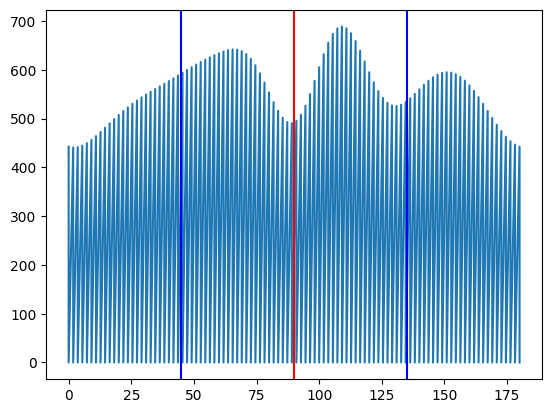

In [82]:
shift_RF_by = [(61, 101), (60, 25), (100, 25), (100, 100), (15, 25), (15, 100)]
ksize = param_dict['ksize']
sigma = 8
lamda = param_dict['lamda']
gamma = param_dict['gamma']
phi = param_dict['phi']
param_collection = {}
for key in param_dict.keys():
    param_collection[key] = []
    print(f"{key} = {param_dict[key]}")


theta = np.linspace(0, np.pi, 100)
k_collection = []
for t in theta:
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, t, lamda, gamma, phi, ktype=cv2.CV_32F)
    k_collection.append(kernel[:ksize,:ksize])
    param_collection['ksize'].append(ksize)
    param_collection['sigma'].append(sigma)
    param_collection['theta'].append(t)
    param_collection['lamda'].append(lamda)
    param_collection['gamma'].append(gamma)
    param_collection['phi'].append(phi)
    for shift_by in shift_RF_by:
        k_shifted = cv2.getRectSubPix(k, (ksize,ksize), shift_by)
        k_collection.append(k_shifted)
        param_collection['ksize'].append(ksize)
        param_collection['sigma'].append(sigma)
        param_collection['theta'].append(t)
        param_collection['lamda'].append(lamda)
        param_collection['gamma'].append(gamma)
        param_collection['phi'].append(phi)
        
n_response = []
for i, k in enumerate(k_collection):
    try:
        n_r = np.sum(img*k)
        n_response.append(n_r)
    except:
        print(i)
        print(k.shape)

# for key in param_dict.keys():
#     print(f"{key} = {param_collection[key]}")
plt.figure()
plt.plot(np.array(param_collection['theta'])*180/np.pi, np.abs(n_response))
plt.axvline(x = 45, color = 'b')
plt.axvline(x = 90, color = 'r')
plt.axvline(x = 135, color = 'b')
    

['filter', '128', '21', '1.5707963267948966', '15.707963267948966', '3.9269908169872414', '0']
ksize 128
sigma 21.0
theta 1.5707963267948966
lamda 15.707963267948966
gamma 3.9269908169872414
phi 0.0


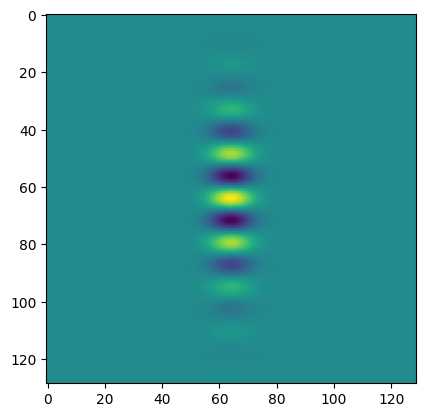

In [4]:
file_name = 'filter_128_21_1.5707963267948966_15.707963267948966_3.9269908169872414_0.jpg'
def parse_gabor_param(file_name):
    print(file_name[:-4].split('_'))
    param_dict = {}
    now_params = file_name[:-4].split('_')
    ksize = int(now_params[1])
    param_dict['ksize'] = ksize
    now_sigma = float(now_params[2])
    param_dict['sigma'] = now_sigma
    now_theta = float(now_params[3])
    param_dict['theta'] = now_theta
    now_lamda = float(now_params[4])
    param_dict['lamda'] = now_lamda
    now_gamma = float(now_params[5])
    param_dict['gamma'] = now_gamma
    phi = float(now_params[6])
    param_dict['phi'] = phi
    kernel = cv2.getGaborKernel((ksize, ksize), now_sigma, now_theta, now_lamda, now_gamma, phi, ktype=cv2.CV_32F)
    return kernel, param_dict
GF, param_dict_2 = parse_gabor_param(file_name)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fimg = cv2.filter2D(img, cv2.CV_8UC3, GF)
plt.imshow(fimg)
plt.imshow(GF)
for k in param_dict_2.keys():
    print(k, param_dict_2[k])

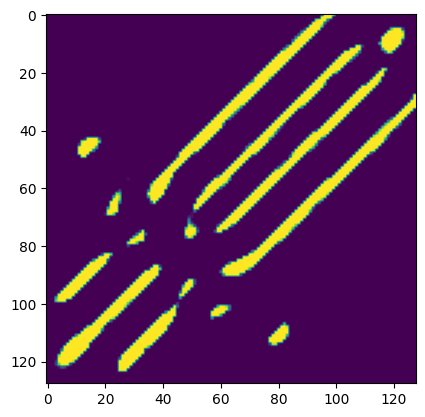

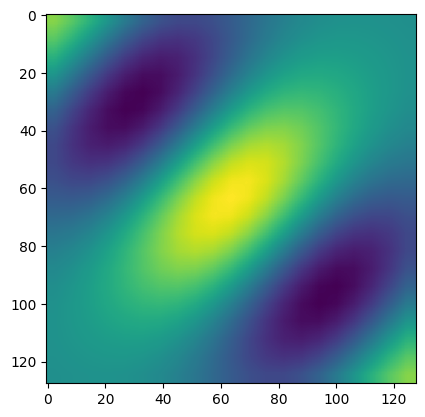

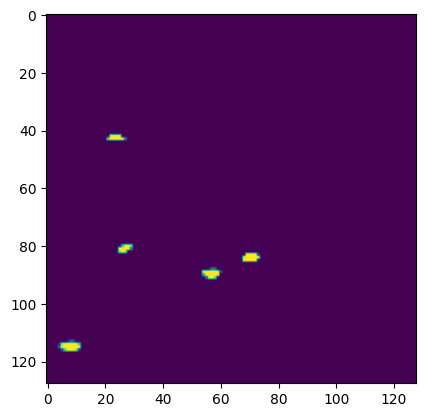

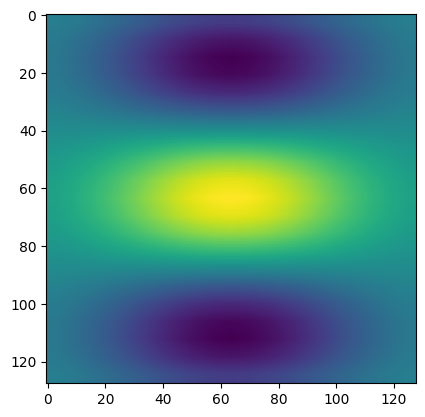

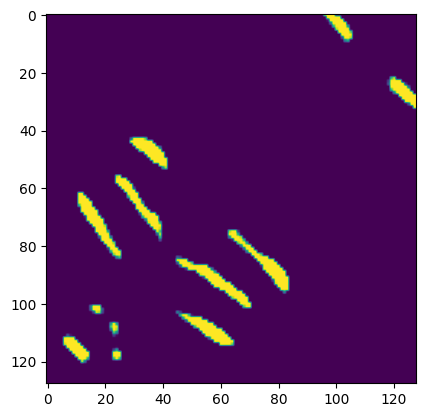

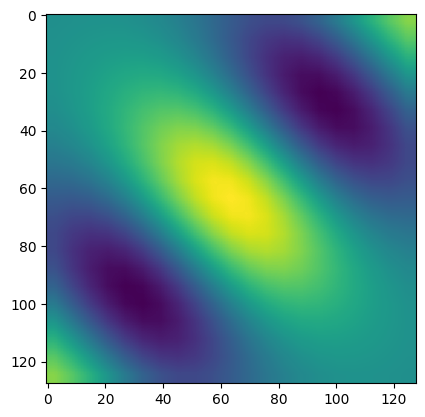

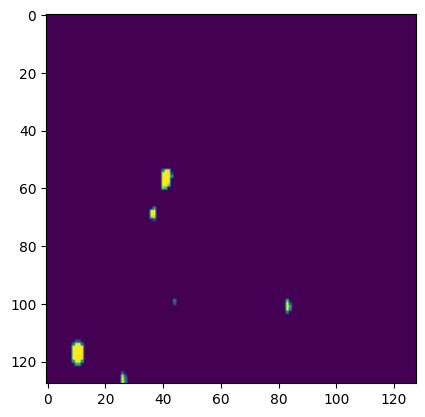

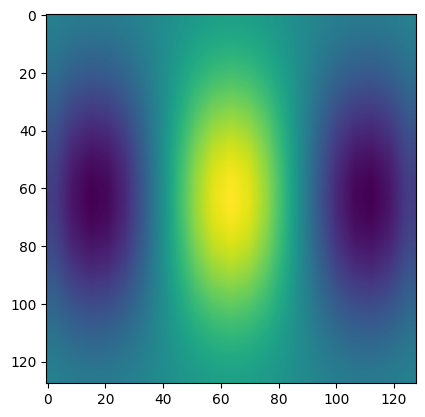

In [165]:
theta = [i * np.pi / 4 for i in range(1,5)]  # /4 shows horizontal 3/4 shows other horizontal. Try other contributions
# ksize = param_dict['ksize']
ksize =  20
# ksize =  128
# sigma = 20
sigma = param_dict_2['sigma']
lamda = param_dict_2['lamda']
gamma = param_dict_2['gamma']
phi = param_dict_2['phi']

k_collection_2 = []

for t in theta:
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, t, lamda, gamma, phi, ktype=cv2.CV_32F)
    
    param_collection['ksize'].append(ksize)
    param_collection['sigma'].append(sigma)
    param_collection['theta'].append(t)
    param_collection['lamda'].append(lamda)
    param_collection['gamma'].append(gamma)
    param_collection['phi'].append(phi)
    k_collection_2.append(kernel)


for k in k_collection_2:
    fimg = cv2.filter2D(img, cv2.CV_8UC3, k)
    plt.figure()
    plt.imshow(fimg)
    plt.figure()
    plt.imshow(cv2.resize(k, (128,128)))
# plt.imshow(k_collection[0])
# plt.imshow(k_collection[1])
# plt.imshow(k_collection[2])
# plt.imshow(k_collection[3])


['filter', '128', '26', '2.356194490192345', '0.07853981633974483', '0.23561944901923448', '0']
ksize 128
sigma 26.0
theta 2.356194490192345
lamda 0.07853981633974483
gamma 0.23561944901923448
phi 0.0


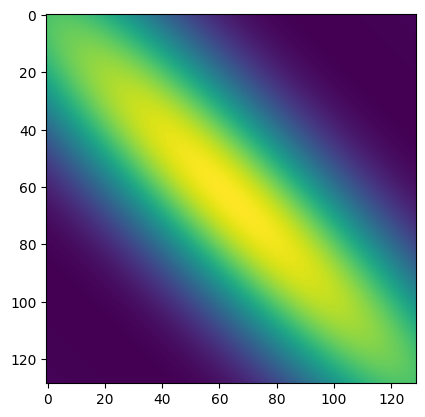

In [146]:
file_name = 'filter_128_26_2.356194490192345_0.07853981633974483_0.23561944901923448_0.jpg'
def parse_gabor_param(file_name):
    print(file_name[:-4].split('_'))
    param_dict = {}
    now_params = file_name[:-4].split('_')
    ksize = int(now_params[1])
    param_dict['ksize'] = ksize
    now_sigma = float(now_params[2])
    param_dict['sigma'] = now_sigma
    now_theta = float(now_params[3])
    param_dict['theta'] = now_theta
    now_lamda = float(now_params[4])
    param_dict['lamda'] = now_lamda
    now_gamma = float(now_params[5])
    param_dict['gamma'] = now_gamma
    phi = float(now_params[6])
    param_dict['phi'] = phi
    kernel = cv2.getGaborKernel((ksize, ksize), now_sigma, now_theta, now_lamda, now_gamma, phi, ktype=cv2.CV_32F)
    return kernel, param_dict
GF, param_dict_3 = parse_gabor_param(file_name)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fimg = cv2.filter2D(img, cv2.CV_8UC3, GF)
plt.imshow(fimg)
plt.imshow(GF)
for k in param_dict_3.keys():
    print(k, param_dict_3[k])


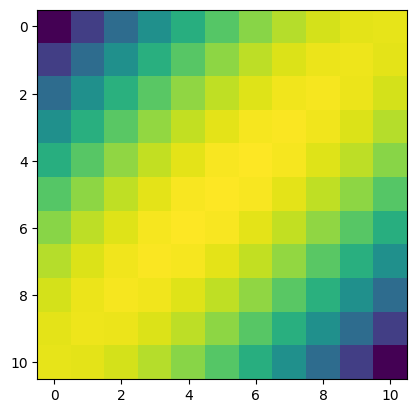

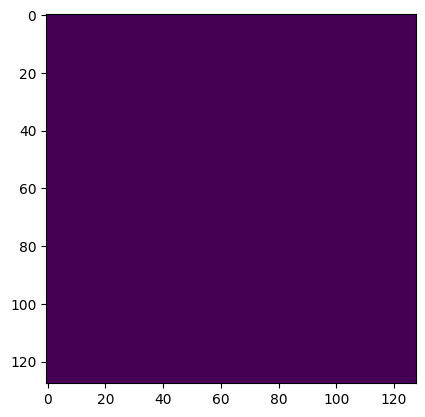

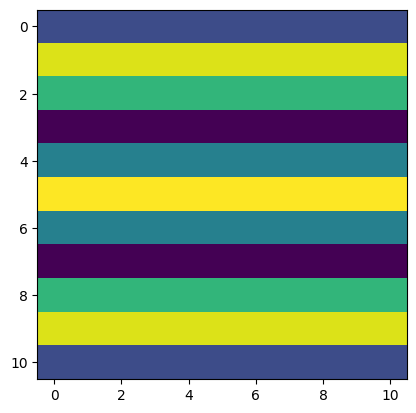

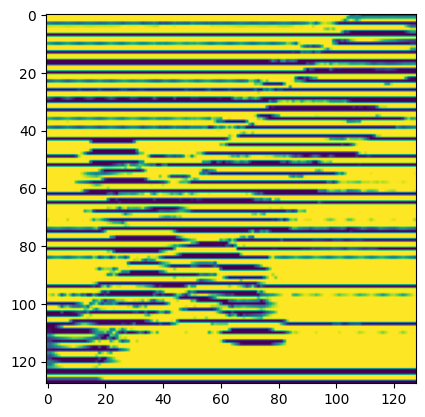

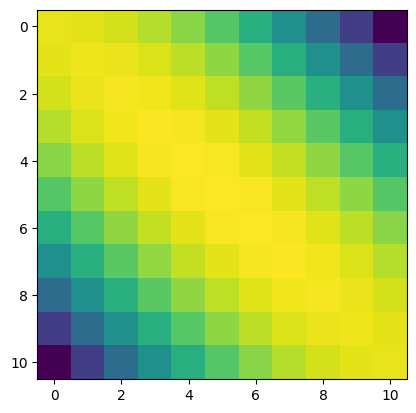

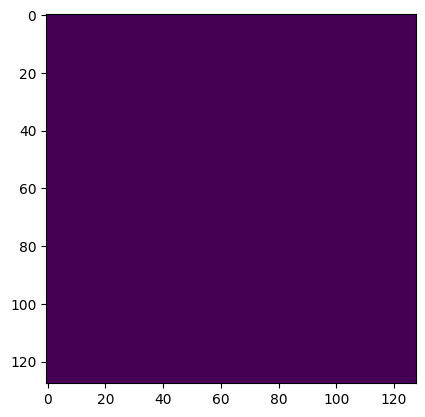

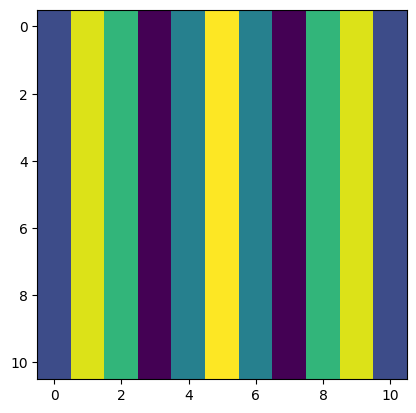

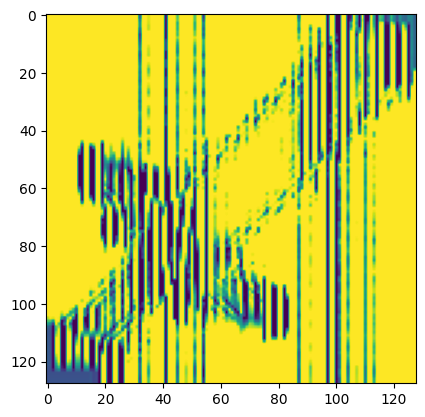

In [151]:
theta = [i * np.pi / 4 for i in range(1,5)]  # /4 shows horizontal 3/4 shows other horizontal. Try other contributions
# ksize = param_dict_3['ksize']
ksize =  10
# sigma = 8
sigma = param_dict_3['sigma']
lamda = param_dict_3['lamda']
gamma = param_dict_3['gamma']
phi = param_dict_3['phi']

k_collection_3 = []

for t in theta:
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, t, lamda, gamma, phi, ktype=cv2.CV_32F)
    
    param_collection['ksize'].append(ksize)
    param_collection['sigma'].append(sigma)
    param_collection['theta'].append(t)
    param_collection['lamda'].append(lamda)
    param_collection['gamma'].append(gamma)
    param_collection['phi'].append(phi)
    k_collection_3.append(kernel)


for k in k_collection_3:
    fimg = cv2.filter2D(img, cv2.CV_8UC3, k)
    plt.figure()
    plt.imshow(k)
    plt.figure()
    plt.imshow(fimg)


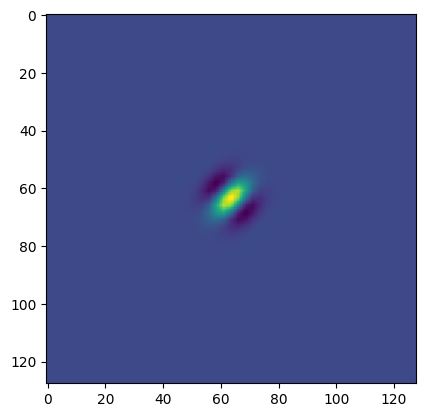

In [6]:
kernel_resized = cv2.resize(kernel, (img.shape))  # Resize image
plt.imshow(kernel_resized)

In [ ]:


# cv2.imshow('Kernel', kernel_resized)
# cv2.imshow('Original Img.', img)
# cv2.imshow('Filtered', fimg)
# cv2.waitKey(5000)
# cv2.destroyAllWindows()

